In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Задача создать модель, предсказывающую отток клиентов. Целевой признак - **Churn** (бинарный, 1- потеряем клиента, 0 - не потеряем). Задача бинарной классификации.

**Описание полей**</br>
Название - Описание - Тип </br>
- **State** - Буквенный код штата - номинальный</br>
- **Account length** - Как долго клиент обслуживается компанией - количественный</br>
- **Area code** - Префикс номера телефона - количественный</br>
- **International plan** - Международный роуминг (подключен/не подключен) - бинарный</br>
- **Voice mail plan** - Голосовая почта (подключена/не подключена) - бинарный</br>
- **Number vmail messages** - Количество голосовых сообщений - количественный</br>
- **Total day minutes** - Общая длительность разговоров днем - количественный</br>
- **Total day calls** - Общее количество звонков днем - количественный</br>
- **Total day charge** - Общая сумма оплаты за услуги днем - количественный</br>
- **Total eve minutes** - Общая длительность разговоров вечером - количественный</br>
- **Total eve calls** - Общее количество звонков вечером - количественный</br>
- **Total eve charge** - Общая сумма оплаты за услуги вечером - количественный</br>
- **Total night minutes** - Общая длительность разговоров ночью - количественный</br>
- **Total night calls** - Общее количество звонков ночью - количественный</br>
- **Total night charge** - Общая сумма оплаты за услуги ночью - количественный</br>
- **Total intl minutes** - Общая длительность международных разговоров - количественный</br>
- **Total intl calls** - Общее количество международных разговоров - количественный</br>
- **Total intl charge** - Общая сумма оплаты за международные разговоры - количественный</br>
- **Customer service calls** - Число обращений в сервисный центр - количественный

In [3]:
df.shape #количество строк и столбцов

(3333, 20)

## Scikit-learn

In [5]:
df_skl=df.copy(deep=True) #делаю копию датафрейма для работы с ним в бибилиотеке Scikit-learn

In [6]:
#меняем тип у не числовых переменноых
df_skl['Churn']=df_skl['Churn'].astype('int64')
d={'No':0, 'Yes':1}
df_skl['International plan']=df_skl['International plan'].map(d) #поменяли No на 0, Yes на 1 в столбце International plan
df_skl['Voice mail plan']=df_skl['Voice mail plan'].map(d) #поменяли No на 0, Yes на 1 в столбце Voice mail plan

In [8]:
df_skl.describe(include='object') #смотрим описание столбца типа object

,State
count,3333
unique,51
top,WV
freq,106


In [9]:
df_skl['State'].value_counts() # смотрим распределение данных в столбце State

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [10]:
df_skl=pd.get_dummies(df_skl, columns=['State']) #создаем столбцы индикатора из столбца State и удаляем сам этот столбец
df_skl.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_skl.shape

(3333, 70)

In [12]:
df_skl.isna().values.any() #есть пропущенные значения?

False

In [13]:
df_skl['Churn'].value_counts() # смотрим распределение данных в столбце Churn. Набор данных несбалансированный

0    2850
1     483
Name: Churn, dtype: int64

In [37]:
data = df_skl.sample(frac=0.95, random_state=786) #датасет без 5% данных, с которым будем дальше работать
data_unseen_skl = df_skl.drop(data.index) #удаляем из исходного датасета, данные, которые выделили выше. то что останется будем использовать для финальных прогнозов при проверке модели
data_unseen_=data_unseen_skl.drop('Churn', axis=1) #датасет без столбца Churn для прогнозирования
data.reset_index(inplace=True, drop=True)
data_unseen_skl.reset_index(inplace=True, drop=True)
print('Данные для моделирования: ' + str(data.shape))
print('Новые данные для прогноза: ' + str(data_unseen_skl.shape))

Данные для моделирования: (3166, 70)
Новые данные для прогноза: (167, 70)


In [38]:
from sklearn.model_selection import train_test_split
#делим датасет на два набора данных: один для обучения (80%) и один — для тестирования (20%) 
train_x, test_x, train_y, test_y=train_test_split(data.drop('Churn', axis=1),data['Churn'],test_size=0.2, random_state=18)

In [39]:
train_x.shape

(2532, 69)

In [40]:
test_x.shape

(634, 69)

In [41]:
train_y.shape

(2532,)

In [42]:
test_y.shape

(634,)

## Градиентный бустинг

### AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
skl_abc=AdaBoostClassifier(random_state=348) #модель
skl_abc.fit(train_x,train_y) #обучаем

AdaBoostClassifier(random_state=348)

In [44]:
skl_abc_predicted=skl_abc.predict(test_x) #тестируем модель
skl_abc.score(test_x,test_y) # смотрим среднее значение accuracy - аккуратность: процент (коэффициент) случаев, классифицированных правильно

0.8848580441640379

In [45]:
from sklearn.metrics import roc_auc_score
skl_abc_probabilities = skl_abc.predict_proba(test_x ) #создаем набор вероятностей прогнозирования на основе тестовых данных. результат функции таблица, где первый столбец - вероятность что Churn=0, второй, что Churn=1
roc_auc_score(test_y, skl_abc_probabilities[:,1] ) #считаем оценки ROC AUC, первый параметр фактические значения Churn, второй - вероятность что Churn=1 

0.8765001113067412

In [46]:
from sklearn.metrics import precision_score
precision_score(test_y, skl_abc_predicted)

0.640625

In [47]:
from sklearn.metrics import recall_score
recall_score(test_y, skl_abc_predicted)

0.45054945054945056

0.8765001113067412

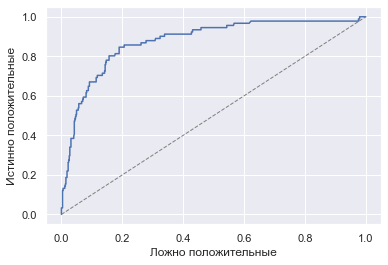

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr,tpr,_=roc_curve(test_y, skl_abc_probabilities[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='grey', lw=1,linestyle='--')
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
metrics.auc(fpr,tpr)

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(test_y, skl_abc_predicted) # матрица неточностей

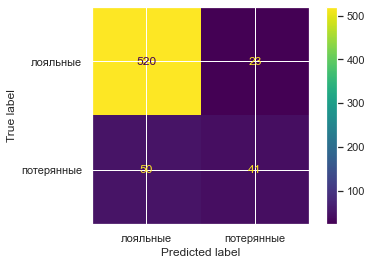

In [50]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['лояльные', 'потерянные'])
disp.plot()

In [51]:
skl_abc_unseen=data_unseen_skl.copy(deep=True)
skl_abc_result=skl_abc.predict(data_unseen_)
skl_abc_unseen.insert(loc=18,column='Predicted', value=skl_abc_result)
#skl_abc_unseen.sort_values(by='Churn',ascending=False).head(22)
res_abc=skl_abc_unseen.where((skl_abc_unseen['Churn']==1)&(skl_abc_unseen['Predicted']==1)) #датасет с данными где предсказали прекращение контракта и это на самом деле случилось
res_abc=res_abc.dropna() 
res_abc.head(22) 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
34,152.0,415.0,1.0,1.0,20.0,237.5,120.0,40.38,253.4,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,112.0,415.0,0.0,0.0,0.0,111.9,92.0,19.02,114.0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,103.0,408.0,0.0,0.0,0.0,150.6,125.0,25.60,169.1,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,82.0,415.0,0.0,0.0,0.0,167.1,77.0,28.41,131.8,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,89.0,415.0,0.0,0.0,0.0,326.3,112.0,55.47,165.1,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131,116.0,408.0,0.0,0.0,0.0,288.0,120.0,48.96,255.8,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


При применении модели AdaBoost из библиотеки Scikit-learn к новым данным 6 случаев из 22 были предсказаны верно

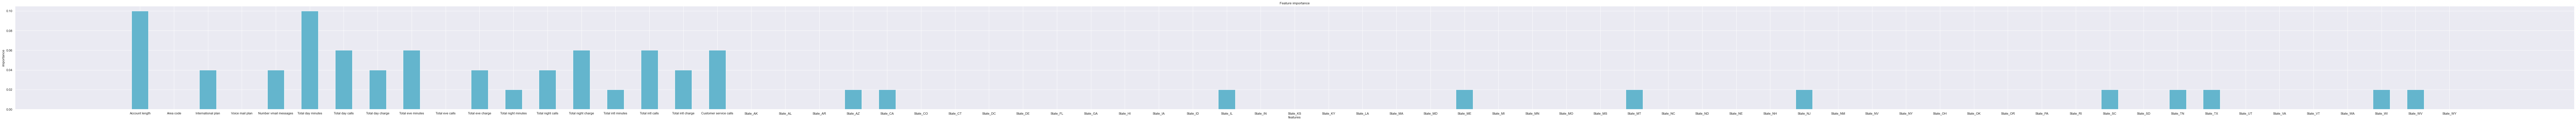

In [53]:
feature_names=np.array(train_x.columns)
feat_imp = skl_abc.feature_importances_

plt.figure(figsize=( 69*1.8, 6  ))

index = np.arange(len(feature_names))

plt.bar(index, feat_imp, color='c', width=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index,feature_names)
plt.tight_layout()

plt.show()

Наиболее значимые признаки (указаны в порядке убывания значимости): Account length, Total day minutes, Total day calls, Total day charge, Total eve charge, Total intl calls, Customer service calls

### GradientBoostingClassifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
skl_gbc=GradientBoostingClassifier(random_state=348)
skl_gbc.fit(train_x,train_y)

GradientBoostingClassifier(random_state=348)

In [55]:
skl_gbc_predicted=skl_gbc.predict(test_x)
skl_gbc.score(test_x,test_y)

0.9511041009463722

In [56]:
skl_gbc_probabilities = skl_gbc.predict_proba(test_x )
roc_auc_score(test_y, skl_gbc_probabilities[:,1] )

0.9515916863983163

In [57]:
precision_score(test_y, skl_gbc_predicted)

0.9054054054054054

In [58]:
recall_score(test_y, skl_gbc_predicted)

0.7362637362637363

0.9515916863983163

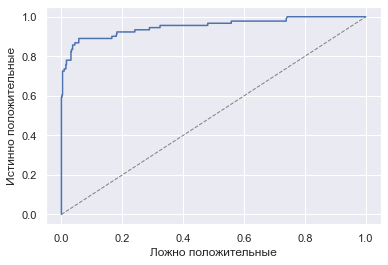

In [59]:
sns.set()
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr,tpr,_=roc_curve(test_y, skl_gbc_probabilities[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='grey', lw=1,linestyle='--')
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
metrics.auc(fpr,tpr)

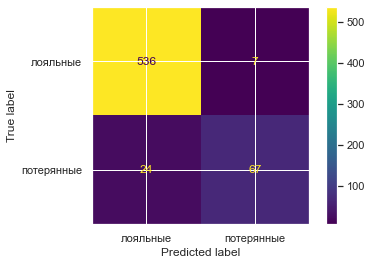

In [61]:
cm=confusion_matrix(test_y, skl_gbc_predicted) # матрица неточностей
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['лояльные', 'потерянные'])
disp.plot()

In [62]:
skl_gbc_unseen=data_unseen_skl.copy(deep=True)
skl_gbc_result=skl_gbc.predict(data_unseen_)
skl_gbc_unseen.insert(loc=18,column='Predicted', value=skl_gbc_result)
#skl_gbc_unseen.sort_values(by='Churn',ascending=False).head(22)
res_gbc=skl_gbc_unseen.where((skl_gbc_unseen['Churn']==1)&(skl_gbc_unseen['Predicted']==1)) #датасет с данными где предсказали прекращение контракта и это на самом деле случилось
res_gbc=res_gbc.dropna() 
res_gbc.head(22) 

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
5,94.0,408.0,0.0,0.0,0.0,157.9,105.0,26.84,155.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,88.0,415.0,0.0,0.0,0.0,264.8,124.0,45.02,245.4,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,152.0,415.0,1.0,1.0,20.0,237.5,120.0,40.38,253.4,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,127.0,408.0,1.0,0.0,0.0,176.9,110.0,30.07,167.9,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,112.0,415.0,0.0,0.0,0.0,111.9,92.0,19.02,114.0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,108.0,415.0,0.0,0.0,0.0,154.2,123.0,26.21,112.3,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,103.0,408.0,0.0,0.0,0.0,150.6,125.0,25.60,169.1,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,82.0,415.0,0.0,0.0,0.0,167.1,77.0,28.41,131.8,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,89.0,415.0,0.0,0.0,0.0,326.3,112.0,55.47,165.1,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,114.0,415.0,0.0,0.0,0.0,147.1,119.0,25.01,161.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


При применении модели GradientBoosting из библиотеки Scikit-learn к новым данным 15 случаев из 22 были предсказаны верно

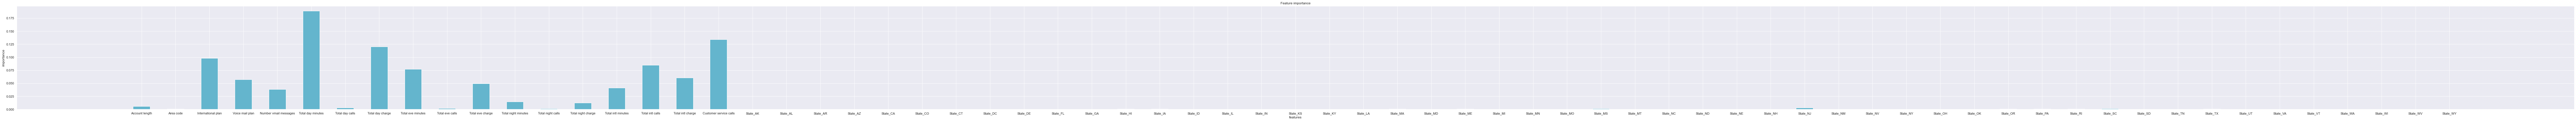

In [63]:
feat_imp = skl_gbc.feature_importances_

plt.figure(figsize=( 69*1.8, 6  ))

index = np.arange(len(feature_names))

plt.bar(index, feat_imp, color='c', width=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index,feature_names)
plt.tight_layout()

plt.show()

Наиболее значимые признаки (указаны в порядке убывания значимости): Total day minutes, Customer service calls, Total day charge, International plan

Среднее значение Accuracy - аккуратность: процент (коэффициент) случаев, классифицированных правильно <br>
Точность модели (Precision) - доля правильных ответов модели во всех предсказанных как положительные<br>
Полнота (Recall) - показывает какую долю объектов, реально относящихся к положительному классу, мы предсказали верно<br>

При применении модели RandomForest из библиотеки Scikit-learn к новым данным 12 случаев из 22 были предсказаны верно<br>
При применении модели AdaBoost из библиотеки Scikit-learn к новым данным 6 случаев из 22 были предсказаны верно<br>
При применении модели GradientBoosting из библиотеки Scikit-learn к новым данным 15 случаев из 22 были предсказаны верно<br>
<br>
При применении модели XGBoost к новым данным 15 случаев из 22 были предсказаны верно<br>
<br>
При обучении моделей с помощью бибилиотеки AutoGluon из 22 отказов правильно были предсказаны:<br>
16 в модели XGBoost<br>
15 в модели LightGBM<br>
14 в модели WeightedEnsemble_L2<br>
14 в модели CatBoost<br>
<br>
При обучении моделей с помощью бибилиотеки PyCaret из 22 отказов правильно были предсказаны:<br>
15 в модели Random Forest<br>
14 в модели XGBoost<br>
13 в модели CatBoost<br>
10 в модели LightGBM

Модели очень чувствительны к данным и при изменении выборки данных получается другое количество правильно предсказанных случаев и оказываются важными другие признаки